In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime, timedelta, timezone
import matplotlib as plot
import matplotlib.pyplot as plt

BTCUSDT_df = pd.read_csv('20250202 12.58.42.-20170908 12.58.42._BTC-USDT_1D_okx_ohlc.csv')
BTCUSDT_df.head()

,timestamp,open,high,low,close,volume,volume_ccy,volCcyQuote,confirm
0,2017-10-10 16:00:23.552,1.0,4901.0,1.0,4901.0,19.260000,94393.260000,94393.260000,1
1,2017-10-11 16:00:00.000,4901.0,4999.0,4790.0,4989.0,0.580096,2894.098894,2894.098894,1
2,2017-10-12 15:59:36.448,4989.0,5922.0,4989.0,5741.6,20.739843,119079.880846,119079.880846,1
3,2017-10-13 15:59:12.896,5741.6,5849.9,5473.7,5849.9,19.259580,112666.616984,112666.616984,1
4,2017-10-14 16:01:00.416,5849.9,5849.9,5686.4,5848.0,8.658607,50635.532625,50635.532625,1


In [ ]:
ETHUSDT_df = pd.read_csv('2025-01-27 22.07.14.075000-2017-09-07 22.07.14.075000_ETH-USDT_1H_ohlc.csv')
LTCUSDT_df = pd.read_csv('2025-01-27 22.11.54.226000-2017-09-07 22.11.54.226000_LTC-USDT_1H_ohlc')
XRPUSDT_df = pd.read_csv('2025-01-27 22.17.22.979000-2017-09-07 22.17.22.979000_XRP-USDT_1H_ohlc.csv')
ADAUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_ADA-USDT_1H_ohlc.csv')
BCHUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_BCH-USDT_1H_ohlc')
DAIUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_DAI-USDT_1H_ohlc')
DOGEUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_DOGE-USDT_1H_ohlc.csv')
DOTUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_DOT-USDT_1H_ohlc.csv')
LINKUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_LINK-USDT_1H_ohlc.csv')
USDCUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_USDC-USDT_1H_ohlc.csv')
SHIBUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_SHIB-USDT_1H_ohlc.csv')
XLMUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_XLM-USDT_1H_ohlc.csv')
BNBUSDT_df = pd.read_csv('2025-01-27 23.34.10.711000-2017-09-07 23.34.10.711000_BNB-USDT_1H_ohlc.csv')
SOLUSDT_df = pd.read_csv('20250202 22.18.32.-20170908 22.18.32._SOL-USDT_1H_okx_ohlc.csv')
TRXUSDT_df = pd.read_csv('20250202 22.18.32.-20170908 22.18.32._TRX-USDT_1H_okx_ohlc.csv')
SOLUSDT_df = pd.read_csv = ('2025-01-27 23.12.01.675000-2017-09-07 23.12.01.675000_SUI-USDT_1H_ohlc.csv')


In [7]:
#RSI CALC
def get_up_or_down(df):
    for i in range(len(df)):
        if i > 0:
            if df.iloc[i]['close'] >= df.iloc[i-1]['close']:
                df.at[i, 'gain'] = df.iloc[i]['close'] - df.iloc[i-1]['close']
                df.at[i, 'loss'] = 0
            elif df.iloc[i]['close'] < df.iloc[i-1]['close']:
                df.at[i, 'loss'] = df.iloc[i-1]['close'] - df.iloc[i]['close']
                df.at[i, 'gain'] = 0
            else:
                df.at[i, 'gain'] = 0
                df.at[i, 'loss'] = 0
    return df

def get_up_or_down_bin(df, offset):
    for i in range(len(df)):
        if i > 0:
            if df.iloc[i]['close'] >= df.iloc[i-offset]['close']:
                df.at[i, 'updown'] = 1
            elif df.iloc[i]['close'] < df.iloc[i-offset]['close']:
                df.at[i, 'updown'] = -1                
            else:
                df.at[i, 'updown'] = 0
    return df
  
def get_relative_strength_index(df):
    df['Date'] = pd.to_datetime(df['timestamp'])
    df.set_index(df['Date'])
    df = get_up_or_down(df)
    return df

def get_average_gains(df, period):
    for i in range(len(df)):
        n, up, down = 0, 0, 0
        if i == period:
            while n < period:
                if df.iloc[i-n]['gain'] > 0:
                    up += df.iloc[i-n]['gain']
                elif df.iloc[i-n]['loss'] > 0:
                    down += df.iloc[i-n]['loss']
                else:
                    up += 0
                    down += 0
                n += 1
            df.at[i, 'ag'] = up/period
            df.at[i, 'al'] = down/period
        elif i > period:
            df.at[i, 'ag'] = (df.iloc[i-1]['ag'] * (period - 1) + df.iloc[i]['gain'])/period
            df.at[i, 'al'] = (df.iloc[i-1]['al'] * (period - 1) + df.iloc[i]['loss'])/period
            df['ag'] = df['ag'].fillna(0)
            df['al'] = df['al'].fillna(0)
    return df

def get_relative_strength(df, period):
    df = get_relative_strength_index(df)
    df = get_average_gains(df, period)
    for i in range(len(df)):
        if i >= period:
            df.at[i, 'rs'] = df.iloc[i]['ag']/df.iloc[i]['al']
            df.at[i, 'rsi'] = (100-(100/(1+df.iloc[i]['rs'])))
    return df

##MONEY FLOW
def get_typical_price(high, low, close):
    typical_price = (high+low+close/3)
    return typical_price

def get_raw_money_flow(typical_price, volume):
    money_flow = typical_price * volume
    return money_flow

def get_money_flow_ratio(money_flow, window=14):
    signal = np.where(money_flow > money_flow.shift(1), 1, np.where(money_flow < money_flow.shift(1), -1, 0))
    money_flow_s = money_flow * signal
    
    money_flow_positive = money_flow_s.rolling(window).apply(lambda x: np.sum(np.where(x >= 0.0, x, 0.0)), raw=True)
    money_flow_negative = abs(money_flow_s.rolling(window).apply(lambda x: np.sum(np.where(x < 0.0, x, 0.0)), raw=True))
    
    money_flow_ratio = money_flow_positive / money_flow_negative
    
    return money_flow_ratio

def get_money_flow_index(money_flow_ratio):
    money_flow_index = 100. - 100./(1. + money_flow_ratio)
    return money_flow_index

def money_flow_index(high, low, close, volume, window=14):
    mfr = get_money_flow_ratio((high+low+close/3) * volume, window)
    mfi = 100. - 100./(1. + mfr)
    return mfi

In [9]:
BTCUSDT_data = get_relative_strength(BTCUSDT_df, 14)
BTCUSDT_data = get_up_or_down_bin(BTCUSDT_data, 1)


BTCUSDT_data['return'] = BTCUSDT_data['close'].pct_change()
BTCUSDT_data['range'] = BTCUSDT_data['high'] - BTCUSDT_data['low']
BTCUSDT_data['range%'] = BTCUSDT_data['range']/BTCUSDT_data['close']
BTCUSDT_data['std'] = BTCUSDT_data['return'].rolling(14).std()
BTCUSDT_data['ma14'] = BTCUSDT_data['close'].rolling(14).mean()
BTCUSDT_data['obv'] = (np.sign(BTCUSDT_data['close'].diff()) * BTCUSDT_data['volume_ccy']).fillna(0).cumsum()
BTCUSDT_data['mfi']= money_flow_index(BTCUSDT_data['high'], BTCUSDT_data['low'], BTCUSDT_data['close'], BTCUSDT_data['volume_ccy'], 14)

BTCUSDT_data['ma07'] = BTCUSDT_data['close'].rolling(7).mean()
BTCUSDT_data['ma28'] = BTCUSDT_data['close'].rolling(28).mean()
BTCUSDT_data['ma56'] = BTCUSDT_data['close'].rolling(56).mean()
BTCUSDT_data['ma112'] = BTCUSDT_data['close'].rolling(112).mean()

BTCUSDT_data['avgvolm07'] = BTCUSDT_data['volume_ccy'].rolling(7).mean()
BTCUSDT_data['avgvolm14'] = BTCUSDT_data['volume_ccy'].rolling(14).mean()
BTCUSDT_data['avgvolm28'] = BTCUSDT_data['volume_ccy'].rolling(28).mean()
BTCUSDT_data['avgvolm56'] = BTCUSDT_data['volume_ccy'].rolling(56).mean()
BTCUSDT_data['avgvolm112'] = BTCUSDT_data['volume_ccy'].rolling(112).mean()

BTCUSDT_data['avgvolty07'] = BTCUSDT_data['std'].rolling(7).mean()
BTCUSDT_data['avgvolty14'] = BTCUSDT_data['std'].rolling(14).mean()
BTCUSDT_data['avgvolty28'] = BTCUSDT_data['std'].rolling(28).mean()
BTCUSDT_data['avgvolty56'] = BTCUSDT_data['std'].rolling(56).mean()
BTCUSDT_data['avgvolty112'] = BTCUSDT_data['std'].rolling(112).mean()

BTCUSDT_data['07d_r'] = (BTCUSDT_data.close / BTCUSDT_data.close.shift(7)) - 1
BTCUSDT_data['14d_r'] = (BTCUSDT_data.close / BTCUSDT_data.close.shift(14)) - 1
BTCUSDT_data['28d_r'] = (BTCUSDT_data.close / BTCUSDT_data.close.shift(28)) - 1
BTCUSDT_data['56d_r'] = (BTCUSDT_data.close / BTCUSDT_data.close.shift(56)) - 1
BTCUSDT_data['112d_r'] = (BTCUSDT_data.close / BTCUSDT_data.close.shift(112)) - 1

BTCUSDT_data['rtrend07'] = BTCUSDT_data['updown'].rolling(7).sum()
BTCUSDT_data['rtrend14'] = BTCUSDT_data['updown'].rolling(14).sum()
BTCUSDT_data['rtrend28'] = BTCUSDT_data['updown'].rolling(28).sum()
BTCUSDT_data['rtrend56'] = BTCUSDT_data['updown'].rolling(56).sum()
BTCUSDT_data['rtrend112'] = BTCUSDT_data['updown'].rolling(112).sum()

BTCUSDT_data.head(50)

,timestamp,open,high,low,close,volume,volume_ccy,volCcyQuote,confirm,Date,...,07d_r,14d_r,28d_r,56d_r,112d_r,rtrend07,rtrend14,rtrend28,rtrend56,rtrend112
0,2017-10-10 16:00:23.552,1.0,4901.0,1.0,4901.0,19.260000,9.439326e+04,9.439326e+04,1,2017-10-10 16:00:23.552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-11 16:00:00.000,4901.0,4999.0,4790.0,4989.0,0.580096,2.894099e+03,2.894099e+03,1,2017-10-11 16:00:00.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-10-12 15:59:36.448,4989.0,5922.0,4989.0,5741.6,20.739843,1.190799e+05,1.190799e+05,1,2017-10-12 15:59:36.448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-13 15:59:12.896,5741.6,5849.9,5473.7,5849.9,19.259580,1.126666e+05,1.126666e+05,1,2017-10-13 15:59:12.896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-10-14 16:01:00.416,5849.9,5849.9,5686.4,5848.0,8.658607,5.063553e+04,5.063553e+04,1,2017-10-14 16:01:00.416,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-10-15 16:00:36.864,5848.0,5848.0,5848.0,5848.0,0.000000,0.000000e+00,0.000000e+00,1,2017-10-15 16:00:36.864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-10-16 16:00:13.312,5848.0,5848.0,5501.0,5598.3,17.862095,9.999737e+04,9.999737e+04,1,2017-10-16 16:00:13.312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-10-17 15:59:49.760,5598.3,5635.0,5159.0,5159.0,10.705649,5.523044e+04,5.523044e+04,1,2017-10-17 15:59:49.760,...,0.052642,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
8,2017-10-18 15:59:26.208,5159.0,5730.9,5159.0,5630.0,20.302000,1.143003e+05,1.143003e+05,1,2017-10-18 15:59:26.208,...,0.128483,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
9,2017-10-19 15:59:02.656,5630.0,5998.9,5536.0,5900.0,36.322792,2.143045e+05,2.143045e+05,1,2017-10-19 15:59:02.656,...,0.027588,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [17]:
fig = go.Figure(data=go.Ohlc(x=BTCUSDT_data['Date'], 
                             open=BTCUSDT_data['open'], 
                             high=BTCUSDT_data['high'], 
                             low=BTCUSDT_data['low'], 
                             close=BTCUSDT_data['close'])) 
  
fig.show() 


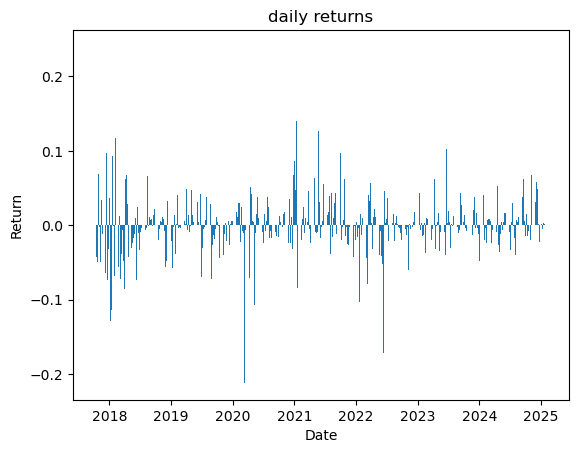

"\nplt.bar(fruits, sales)\nplt.title('Fruit Sales')\n\n\n"

In [15]:
plt.bar(BTCUSDT_data['Date'], BTCUSDT_data['return'])
plt.title('daily returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.show()
                              

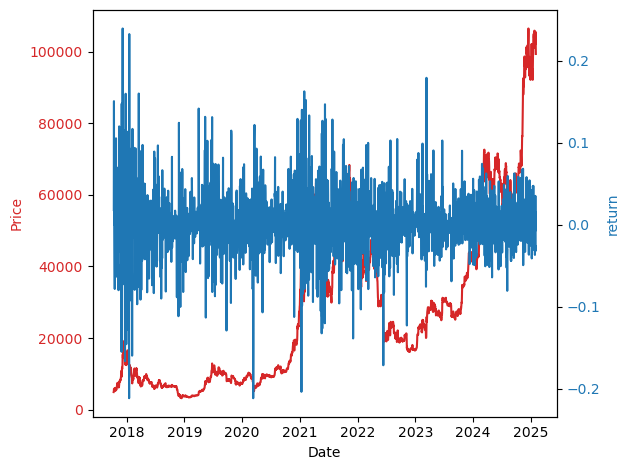

In [22]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='tab:red')
ax1.plot(BTCUSDT_data['Date'], BTCUSDT_data['close'], color="tab:red")
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  

ax2.set_ylabel('return', color='tab:blue')  
ax2.plot(BTCUSDT_data['Date'], BTCUSDT_data['return'], color="tab:blue")
ax2.tick_params(axis='y', labelcolor="tab:blue")

fig.tight_layout()  
plt.show()


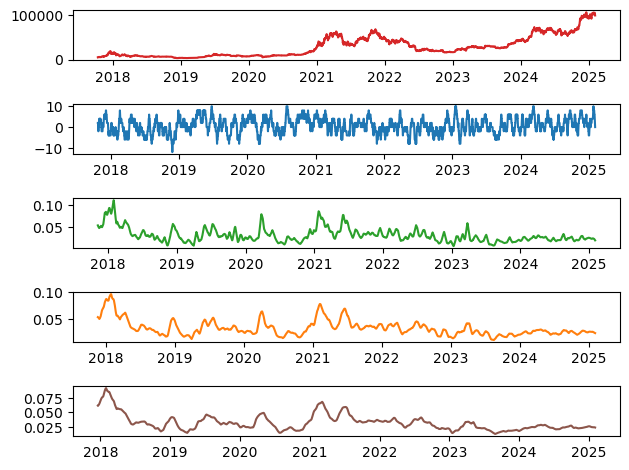

In [29]:
fig, axis = plt.subplots(5,1)

axis[0].plot(BTCUSDT_data['Date'], BTCUSDT_data['close'], color="tab:red")
axis[1].plot(BTCUSDT_data['Date'], BTCUSDT_data['rtrend14'], color="tab:blue")
axis[2].plot(BTCUSDT_data['Date'], BTCUSDT_data['avgvolty14'], color="tab:green")
axis[3].plot(BTCUSDT_data['Date'], BTCUSDT_data['avgvolty28'], color="tab:orange")
axis[4].plot(BTCUSDT_data['Date'], BTCUSDT_data['avgvolty56'], color="tab:brown")

fig.tight_layout()  

plt.show()

In [51]:
#Assign Markov State
BTC_df = BTCUSDT_data[112:].copy()

markov_conditions = [
    (abs(BTC_df['rtrend28'])<5) & (BTC_df['std']>BTC_df['avgvolty56']) & (abs(BTC_df['ma07'] - BTC_df['ma14'])/BTC_df['ma07']<0.5), #rangebound/consolidating,
    (abs(BTC_df['rtrend28'])>7) & (abs(BTC_df['rtrend07'])>5) & (BTC_df['std']<BTC_df['avgvolty56']) & (BTC_df['ma07'] > BTC_df['ma14'] ) #trending,)
]

results = ["RANGEBOUND", "TRENDING"]

BTC_df["markov_state"] = np.select(markov_conditions, results)

BTC_df.head(50)


'\n\ndef assign_markov_state(rtrend_long, rtrend_short, std, volty, sma_long, sma_short):\n    return True if abs(rtrend_long)<2 and abs(rtrend_short)>3 and std>volty and (abs(sma_short - sma_long)/sma_short) <0.1#all conditions of the state:\n\nBTCUSDT_data[\'markov_state\'] = \n\nfor line in BTCUSDT_data:\n    if abs(BTCUSDT_data[\'rtrend14\'])<2 and abs(BTCUSDT_data[\'rtrend14\'])>3 and BTCUSDT_data[\'std\']>BTCUSDT_data[\'avgvolty56\'] and abs(BTCUSDT_data[\'sma07\'] - BTCUSDT_data[\'sma14\'])/BTCUSDT_data[\'sma07\']<0.1:#all conditions of the state:\n        BTCUSDT_data[\'markov_state\'] = \'CONSOLIDATION\'\n        \nfor line in BTCUSDT_data:\n    if \'markov state\' == "CONSOLIDATION":\n        #average of highs (don\'t know how to determine this yet) = max_target\n        #average of lows (don\'t know how to determine this yet) = min_target\n\nBTCUSDT_data[\'markov_state\'] = BTCUSDT_data[\'std\'].rolling(112).mean()\n'

In [53]:
#BTC_df.head(50)
BTC_df.tail(50)

,timestamp,open,high,low,close,volume,volume_ccy,volCcyQuote,confirm,Date,...,14d_r,28d_r,56d_r,112d_r,rtrend07,rtrend14,rtrend28,rtrend56,rtrend112,markov_state
2622,2024-12-14 16:00:05.120,101624.2,103360.7,100606.9,102696.9,4526.306493,4.625642e+08,4.625642e+08,1,2024-12-14 16:00:05.120,...,0.058410,0.137790,0.496344,0.601299,1.0,4.0,8.0,12.0,22.0,0
2623,2024-12-15 15:59:41.568,102696.9,106660.8,102580.5,106319.9,10591.116908,1.110469e+09,1.110469e+09,1,2024-12-15 15:59:41.568,...,0.095677,0.151479,0.579051,0.673433,3.0,4.0,8.0,14.0,24.0,0
2624,2024-12-16 15:59:18.016,106324.7,108365.0,105461.5,106471.0,10071.252194,1.075927e+09,1.075927e+09,1,2024-12-16 15:59:18.016,...,0.112737,0.152524,0.582424,0.725512,5.0,6.0,8.0,16.0,26.0,0
2625,2024-12-17 15:58:54.464,106471.1,107636.3,103113.2,104427.3,9900.932417,1.039491e+09,1.039491e+09,1,2024-12-17 15:58:54.464,...,0.090667,0.102427,0.576975,0.769882,3.0,4.0,6.0,16.0,26.0,0
2626,2024-12-18 16:00:41.984,104432.5,104983.4,98770.1,100676.1,18639.583384,1.890489e+09,1.890489e+09,1,2024-12-18 16:00:41.984,...,-0.006238,0.041550,0.487142,0.656473,1.0,2.0,4.0,14.0,24.0,0
2627,2024-12-19 16:00:18.432,100676.1,101199.9,92268.0,96989.3,28942.186568,2.788970e+09,2.788970e+09,1,2024-12-19 16:00:18.432,...,-0.023390,-0.016839,0.432898,0.669696,1.0,2.0,2.0,14.0,24.0,RANGEBOUND
2628,2024-12-20 15:59:54.880,96988.9,99553.7,95400.0,97524.1,9625.330780,9.396834e+08,9.396834e+08,1,2024-12-20 15:59:54.880,...,-0.022151,-0.008672,0.458060,0.652564,1.0,2.0,4.0,16.0,24.0,RANGEBOUND
2629,2024-12-21 15:59:31.328,97524.0,98053.6,95131.0,95370.9,4575.487158,4.421750e+08,4.421750e+08,1,2024-12-21 15:59:31.328,...,-0.045404,-0.005734,0.406941,0.638278,-1.0,0.0,4.0,14.0,24.0,RANGEBOUND
2630,2024-12-22 15:59:07.776,95370.9,96538.4,93112.0,93256.3,8426.239671,8.007190e+08,8.007190e+08,1,2024-12-22 15:59:07.776,...,-0.046512,-0.028531,0.361575,0.593153,-3.0,0.0,2.0,12.0,22.0,RANGEBOUND
2631,2024-12-23 16:00:55.296,93253.9,98319.7,92525.0,98306.8,8754.381183,8.286940e+08,8.286940e+08,1,2024-12-23 16:00:55.296,...,0.027713,0.059168,0.357861,0.703049,-3.0,2.0,4.0,12.0,24.0,RANGEBOUND
